In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

df_stck = pd.read_feather("resources/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [2]:
df_stck['age_first_code_cut'] # child ( age < 14 ) or adult ( age > 14 )

0       adult
1       child
2       child
3       adult
4       adult
        ...  
2256    child
2257    child
2258    child
2259    child
2260    child
Name: age_first_code_cut, Length: 2261, dtype: object

In [3]:
first_code_boot_distn = []

for _ in range(5000):
    first_code_boot_distn.append(
        np.mean(
            (df_stck.sample(frac=1, replace=True)['age_first_code_cut'] == 'child').mean()
        )
    )

# Veri setinden yerine koyarak rastgele örnekler çekiliyor( sample(frac=1, replace=True) )
# Bu örneklerde 'child' kategorisinde olanların oranı hesaplanıyor.
# Bu oran first_code_boot_distn listesine ekleniyor.

In [4]:
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()
prop_child_samp
# Orijinal veri setindeki çocuk yaşta kodlamaya başlayanların gerçek oranı hesaplanıyor.

0.39141972578505085

In [5]:
prop_child_hyp = 0.35
# Bu satırda hipotez değerini belirliyoruz. Yani çocuk yaşta kodlamaya başlayanların oranı 0.35'tir şeklinde bir hipotez kuruyorsunuz ve bu H0 hipotezi oluyor.

In [6]:
std_err = np.std(first_code_boot_distn, ddof=1)
std_err
# bootstrap örnekleminin standart sapmasını hesaplıyoruz bu standart hatayı vermektedir.
# ilerleyen kısımlarda standart hatayı hesaplamanın daha efektif bir yolunu kodlayacağız

0.01024875719664497

In [7]:
z_score = (prop_child_samp - prop_child_hyp) / std_err
z_score

# z-score hesaplanıyor. Bu değer, gözlemlenen oranın(prop_child_samp) hipotez değerinden (prop_child_hyp) ne kadar uzakta olduğunu standart hata cinsinden ölçüyor.

4.0414388779363435

Bu analiz, Stack Overflow kullanıcıları arasında çocuk yaşta kodlamaya başlayanların oranının 0.35'ten anlamlı derecede farklı olup olmadığını test ediyor. Büyük bir z-skoru (mutlak değerce 1.96'dan büyük), hipotezimizin reddedilmesi gerektiğini gösterir.
Bu analizi günlük hayattan bir örnekle açıklarsak: Bir şehirdeki basketbolcuların boy ortalamasının 1.85m olduğunu düşünüyoruz (hipotezimiz). Elimizde bir grup basketbolcu var ve onların boy ortalamasını ölçüyoruz. Acaba ölçtüğümüz ortalama gerçekten 1.85m'den farklı mı, yoksa rastgele şans eseri mi böyle çıktı? İşte bootstrap yöntemi ve z-skor bize bu sorunun cevabını veriyor.

In [8]:
from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

# norm.cdf(z_score): z-score'dan daha küçük değerlerin olasılığını verirken
# 1 - norm.cdf(z_score): z_score'dan daha büyük değerlerin olasılığını verir(sağ kuyruk)
# Eğer sol kuyruk testi yapsaydık direkt norm.cdf(z_score) kullanacaktık

2.656211426266264e-05

Eğer hesaplanan p-değeri belirlenen anlamlılık düzeyinden (genellikle 0.05) küçükse, hipotezimizi reddederiz. Bu, gözlemlediğimiz sonucun şans eseri ortaya çıkma olasılığının çok düşük olduğu anlamına gelir.

In [9]:
# Anlamlılık düzeyi
from scipy.stats import norm

alpha = 0.5 # Anlamlılık düzeyi belirlenir
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean() # Örneklemdeki çocuk oranı
prop_child_hyp = 0.35 # Hipotez değeri

std_err = np.std(first_code_boot_distn, ddof=1) # Bootstrap örnekleminin standart sapması standart hatayı verir. Standart hata hesaplanır.
z_score = (prop_child_samp - prop_child_hyp) / std_err

p_value = 1 - norm.cdf(z_score)
p_value

2.656211426266264e-05

In [10]:
p_value <= alpha

True

In [11]:
import numpy as np

lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)

(lower, upper)

(0.3710747456877488, 0.41132242370632466)

$H_0: \mu_{child} - \mu_{adult} = 0$ (Çocuk yaşta kodlamaya başlayanlar ile yetişkin yaşta kodlamaya başlayanların maaşları arasında anlamlı bir fark yoktur.)

$H_A: \mu_{child} > \mu_{adult}$ (Çocuk yaşta kodlamaya başlayanların maaşları daha yüksektir.)

In [12]:
xbar = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()

print(f"{xbar.index[0]}: {xbar.iloc[0]:.1f}")
print(f"{xbar.index[1]}: {xbar.iloc[1]:.1f}")

adult: 111313.3
child: 132419.6


In [13]:
pay = xbar.iloc[1] - xbar.iloc[0]

In [14]:
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()

print(f"{s.index[0]}: {s.iloc[0]:.1f}")
print(f"{s.index[1]}: {s.iloc[1]:.1f}")

adult: 271546.5
child: 255585.2


In [15]:
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()

print(f"{n.index[0]}: {n.iloc[0]}")
print(f"{n.index[1]}: {n.iloc[1]}")

adult: 1376
child: 885


In [16]:
payda = np.sqrt(s.iloc[1]**2 / n.iloc[1] + s.iloc[0]**2 / n.iloc[0])
payda

11287.18430352594

$t = \frac{(\bar{x}_{child} - \bar{x}_{adult})}{\sqrt{\frac{s^2_{child}}{n_{child}} + \frac{s^2_{adult}}{n_{adult}}}}$

In [17]:
t = pay / payda
t

1.8699313316221844

In [18]:
import pandas as pd

df_election = pd.read_feather("resources/repub_votes_potus_08_12.feather")
df_election.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [22]:
sample_data = df_election.copy()
sample_data['diff'] = sample_data['repub_percent_08'] - \
sample_data['repub_percent_12']
sample_data.head()

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812


(array([ 1.,  1.,  3., 12., 29., 28., 21.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-16.73039829, -14.08019672, -11.42999514,  -8.77979356,
         -6.12959198,  -3.4793904 ,  -0.82918882,   1.82101276,
          4.47121434,   7.12141592,   9.7716175 ,  12.42181908,
         15.07202066,  17.72222224,  20.37242382,  23.0226254 ,
         25.67282698,  28.32302856,  30.97323013,  33.62343171,
         36.27363329]),
 <BarContainer object of 20 artists>)

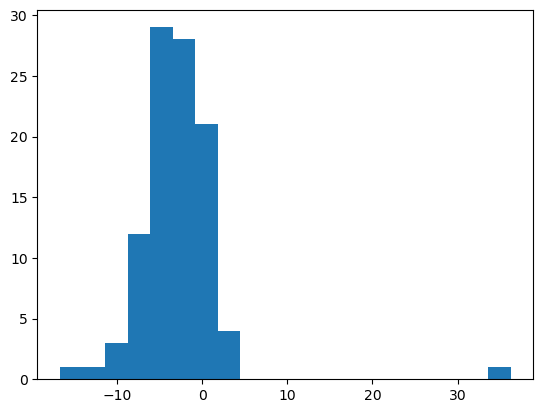

In [23]:
plt.hist(sample_data['diff'], bins=20)

In [26]:
x_bar_diff = sample_data['diff'].mean()

n_diff = sample_data.shape[0]

s_diff = sample_data['diff'].std()

t_stat = (x_bar_diff - 0) / np.sqrt(s_diff**2 / n_diff)

t_stat

-5.601043121928489